<a href="https://colab.research.google.com/github/TanChen168/Week11_IntroductionToDeepLearning/blob/main/CNNExercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(X_train, y_train), (X_test, y_test)  = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [6]:
#X_train = X_train.shape
X_train.shape

(60000, 28, 28)

In [7]:
# Scale data between 0 and 1
X_train = X_train / 255
X_test = X_test / 255

In [8]:
# Reshape data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [9]:
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [10]:
input_shape = X_train.shape[1:4]
input_shape

(28, 28, 1)

In [11]:
model = Sequential()

In [12]:
# Convolutional layer
model.add(Conv2D(filters = 8, # How many filters you want to use
                 kernel_size = 3, # size of each filter
                 activation = 'relu',
                 input_shape = input_shape)) # What is the shape of your input features (we defined this above)

# Pooling layer
model.add(MaxPooling2D(pool_size = 2)) # Size of pooling

# Flattening layer
model.add(Flatten())
# Output layer

model.add(Dense(10, # How many output possibilities we have
                activation = 'softmax')) # What activation function are you using?

In [13]:
# Step 2: Compile
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [14]:
# Step 3: Fit our model
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=20)

Epoch 1/20
1875/1875 [==============================] - 17s 5ms/step - loss: 1.3713 - acc: 0.5947 - val_loss: 0.8508 - val_acc: 0.7062
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7442 - acc: 0.7478 - val_loss: 0.6984 - val_acc: 0.7522
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6460 - acc: 0.7707 - val_loss: 0.6453 - val_acc: 0.7632
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6019 - acc: 0.7836 - val_loss: 0.6112 - val_acc: 0.7776
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5751 - acc: 0.7936 - val_loss: 0.5914 - val_acc: 0.7815
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5561 - acc: 0.8003 - val_loss: 0.5782 - val_acc: 0.7880
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5421 - acc: 0.8070 - val_loss: 0.5638 - val_acc: 0.7979
Epoch 8/20
1875/1875 [==============================] - 8s 4m

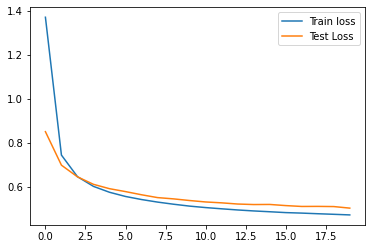

In [15]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

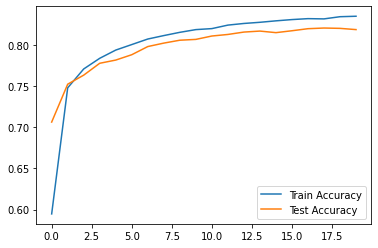

In [16]:
# Visualize the accuracy
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Test Accuracy')
plt.legend();